# Other Upstream Principal Component Analysis (PCA) and Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.metrics import (r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error)
from sklearn.preprocessing import PowerTransformer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from IPython.display import display

# Import other_upstream dataframe
other_upstream=pd.read_csv('other_upstream.csv')

In [2]:
other_upstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                230 non-null    object 
 1   account_id                  230 non-null    int64  
 2   Year                        230 non-null    int64  
 3   incorporated_country        230 non-null    object 
 4   Primary activity            230 non-null    object 
 5   Primary sector              230 non-null    object 
 6   Market_Cap_USD              198 non-null    float64
 7   Third_party_verification    230 non-null    object 
 8   Revenue_USD                 197 non-null    float64
 9   ebitda_USD                  197 non-null    float64
 10  grossProfit_USD             197 non-null    float64
 11  netIncome_USD               197 non-null    float64
 12  cashAndCashEquivalents_USD  197 non-null    float64
 13  shortTermInvestments_USD    197 non

In [3]:
other_upstream.head()

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,scope_1_2_emissions_amount,Year_sq
0,Aviva plc,1268,2018,United Kingdom,Insurance,Financial services,1.880010e+10,Third-party verification or assurance process ...,2.828417e+10,2.565400e+08,...,7.073011e+10,5.454917e+11,1.164463e+10,8.914511e+10,1.360678e+10,2.343785e+10,Other (upstream),141.0,61086.50,4072324
1,Indivior,54744,2018,United Kingdom,Pharmaceuticals,Biotech & pharma,8.169508e+08,No third-party verification or assurance,1.005000e+09,3.490000e+08,...,0.000000e+00,1.547000e+09,1.481000e+09,0.000000e+00,2.410000e+08,6.600000e+07,Other (upstream),171.7,1795.55,4072324
2,Kingfisher,10156,2018,United Kingdom,Specialist retail,Discretionary retail,5.248698e+09,Third-party verification or assurance process ...,1.483995e+10,1.195070e+09,...,1.905000e+07,1.504696e+10,7.237730e+09,1.905000e+07,3.512820e+09,7.809230e+09,Other (upstream),1168.0,234624.50,4072324
3,London Stock Exchange Group,10871,2018,United Kingdom,Banks,Financial services,1.820732e+10,Third-party verification or assurance process ...,2.711450e+09,1.203960e+09,...,3.175000e+07,1.070414e+12,1.065718e+12,3.175000e+07,2.797810e+09,4.696460e+09,Other (upstream),37.0,44813.50,4072324
4,Petra Diamonds Pty Ltd,44407,2018,United Kingdom,Other non-metallic minerals,Other mineral mining,3.260332e+08,Third-party verification or assurance process ...,4.636000e+08,1.539000e+08,...,0.000000e+00,1.294800e+09,9.687000e+08,0.000000e+00,7.711000e+08,3.261000e+08,Other (upstream),2992.0,196661.74,4072324


In [4]:
# Rename features
other_upstream = other_upstream.rename(columns={'incorporated_country': 'Countries',
                                          'Primary activity': 'Primary_activity',
                                          'Primary sector': 'Primary_sector'})

# Drop unneeded columns
other_upstream = other_upstream.drop(
    ['Third_party_verification', 'Scope_3_emissions_type'], axis=1, errors='ignore')

other_upstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                230 non-null    object 
 1   account_id                  230 non-null    int64  
 2   Year                        230 non-null    int64  
 3   Countries                   230 non-null    object 
 4   Primary_activity            230 non-null    object 
 5   Primary_sector              230 non-null    object 
 6   Market_Cap_USD              198 non-null    float64
 7   Revenue_USD                 197 non-null    float64
 8   ebitda_USD                  197 non-null    float64
 9   grossProfit_USD             197 non-null    float64
 10  netIncome_USD               197 non-null    float64
 11  cashAndCashEquivalents_USD  197 non-null    float64
 12  shortTermInvestments_USD    197 non-null    float64
 13  longTermInvestments_USD     197 non

In [5]:
# Looking at missing data
print(other_upstream.isnull().mean().sort_values(ascending=False).round(3) * 100)

cashAndCashEquivalents_USD    14.3
totalLiabilities_USD          14.3
totalEquity_USD               14.3
totalDebt_USD                 14.3
Revenue_USD                   14.3
ebitda_USD                    14.3
grossProfit_USD               14.3
netIncome_USD                 14.3
totalInvestments_USD          14.3
shortTermInvestments_USD      14.3
longTermInvestments_USD       14.3
totalAssets_USD               14.3
Market_Cap_USD                13.9
scope_1_2_emissions_amount     0.0
Scope_3_emissions_amount       0.0
account_name                   0.0
account_id                     0.0
Primary_sector                 0.0
Primary_activity               0.0
Countries                      0.0
Year                           0.0
Year_sq                        0.0
dtype: float64


## Principal Component Analysis

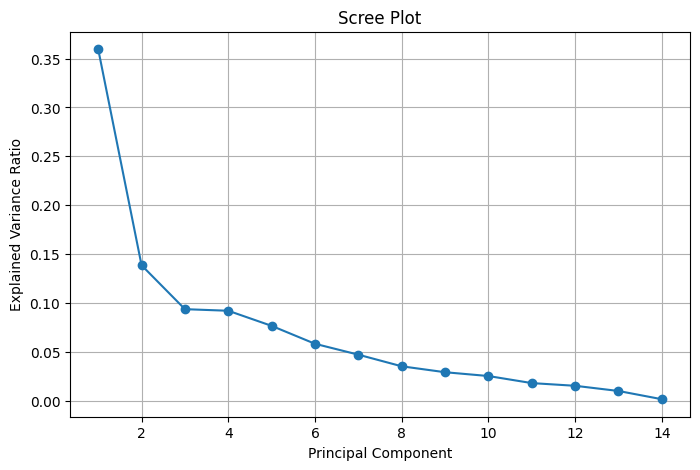

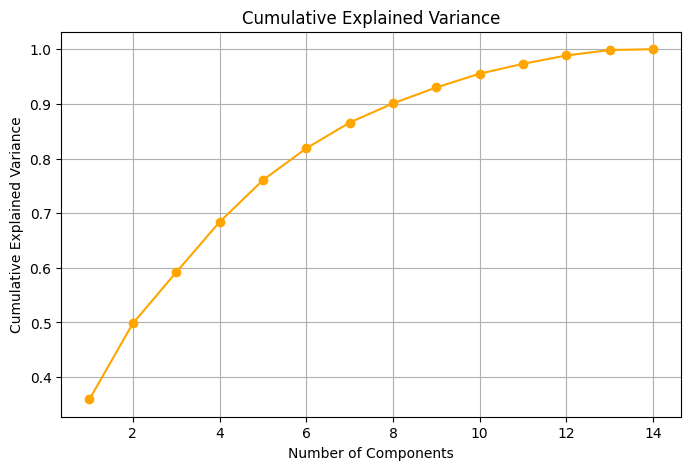

Cumulative variance explained by each additional principal component:
  PC1: 0.3596
  PC2: 0.4981
  PC3: 0.5918
  PC4: 0.6838
  PC5: 0.7604
  PC6: 0.8186
  PC7: 0.8657
  PC8: 0.9009
  PC9: 0.9300
  PC10: 0.9553
  PC11: 0.9733
  PC12: 0.9885
  PC13: 0.9985
  PC14: 1.0000


In [6]:
# --- STEP 1: Select appropriate columns for PCA ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in other_upstream.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(other_upstream[col])
    and col != "Scope_3_emissions_amount"
]
X = other_upstream[numeric_cols].copy()

# --- STEP 2: Apply sign-log transformation ---
def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)

# --- STEP 3: Drop rows with missing values (keep track of indices) ---
X_dropped = X_transformed.dropna()
pca_indices = X_dropped.index

# --- STEP 4: Standardize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)

# --- STEP 5: Fit PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- STEP 6: Create a DataFrame for PCs, index matches original ---
num_pcs = X_pca.shape[1]
pc_columns = [f"PC{i+1}" for i in range(num_pcs)]
pcs_df = pd.DataFrame(X_pca, columns=pc_columns, index=pca_indices)

# --- STEP 7: Append PCs back to the original DataFrame (only for valid rows) ---
other_upstream_with_pcs = other_upstream.copy()
for col in pc_columns:
    other_upstream_with_pcs[col] = np.nan  # initialize with NaN

other_upstream_with_pcs.loc[pcs_df.index, pc_columns] = pcs_df

# --- Plots ---
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_var_ratio) + 1),
    np.cumsum(explained_var_ratio),
    marker='o',
    color='orange'
)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# --- Print cumulative variance explained for each PC ---
cumulative_var = np.cumsum(explained_var_ratio)
print("Cumulative variance explained by each additional principal component:")
for i, var in enumerate(cumulative_var, start=1):
    print(f"  PC{i}: {var:.4f}")

# --- END ---
# other_upstream_with_pcs now contains the principal components for valid rows.

Eight pc's explains >90% of the variance in the data, while 5 pc's is at the bottom of the "elbow" with much less significant return for each increase in number of pc's.<br>
I'll investigate both 8 pc's and 5 pc's performance on HLM models.

In [7]:
# --- Prepare Data ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in other_upstream.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(other_upstream[col])
    and col != "Scope_3_emissions_amount"
]
X = other_upstream[numeric_cols].copy()

def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)
pca_data = X_transformed.dropna().copy()
pca_data["account_id"] = other_upstream.loc[pca_data.index, "account_id"]
pca_data["Year"] = other_upstream.loc[pca_data.index, "Year"]

X_pca_input = pca_data.drop(columns=["account_id", "Year"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# --- PCA for 8 components (PC8) ---
pca8 = PCA(n_components=8)
pcs8 = pca8.fit_transform(X_scaled)
pcs8_df = pd.DataFrame(pcs8, columns=[f"PC8_{i+1}" for i in range(8)], index=pca_data.index)

# --- PCA for 5 components (PC5) ---
pca5 = PCA(n_components=5)
pcs5 = pca5.fit_transform(X_scaled)
pcs5_df = pd.DataFrame(pcs5, columns=[f"PC5_{i+1}" for i in range(5)], index=pca_data.index)

# --- Merge all PC features to original DataFrame ---
other_upstream_pca = other_upstream.copy()
other_upstream_pca = other_upstream_pca.join(pcs8_df)
other_upstream_pca = other_upstream_pca.join(pcs5_df)

# --- Add transformed target and optionally other features ---
other_upstream_pca['slog_Scope_3_emissions_amount'] = sign_log_transform(other_upstream_pca['Scope_3_emissions_amount'])

# Optional: Rename columns for consistency
other_upstream_pca = other_upstream_pca.rename(columns={'incorporated_country': 'Countries',
                                               'Primary activity': 'Primary_activity',
                                               'Primary sector': 'Primary_sector'})

# Now other_upstream_pca contains all PC8 and PC5 features for downstream HLM modeling

In [8]:
other_upstream_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   230 non-null    object 
 1   account_id                     230 non-null    int64  
 2   Year                           230 non-null    int64  
 3   Countries                      230 non-null    object 
 4   Primary_activity               230 non-null    object 
 5   Primary_sector                 230 non-null    object 
 6   Market_Cap_USD                 198 non-null    float64
 7   Revenue_USD                    197 non-null    float64
 8   ebitda_USD                     197 non-null    float64
 9   grossProfit_USD                197 non-null    float64
 10  netIncome_USD                  197 non-null    float64
 11  cashAndCashEquivalents_USD     197 non-null    float64
 12  shortTermInvestments_USD       197 non-null    flo

## HLM Model using PC8 pc's for numeric fixed effects

In [9]:
# --- Prepare Data ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in other_upstream.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(other_upstream[col])
    and col != "Scope_3_emissions_amount"
]
X = other_upstream[numeric_cols].copy()

def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))

X_transformed = X.apply(sign_log_transform)
pca_data = X_transformed.dropna().copy()
pca_data["account_id"] = other_upstream.loc[pca_data.index, "account_id"]
pca_data["Year"] = other_upstream.loc[pca_data.index, "Year"]

X_pca_input = pca_data.drop(columns=["account_id", "Year"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# --- PCA for 8 components (PC8) ---
pca8 = PCA(n_components=8)
pcs8 = pca8.fit_transform(X_scaled)
pcs8_df = pd.DataFrame(pcs8, columns=[f"PC8_{i+1}" for i in range(8)], index=pca_data.index)

# --- PCA for 5 components (PC5) ---
pca5 = PCA(n_components=5)
pcs5 = pca5.fit_transform(X_scaled)
pcs5_df = pd.DataFrame(pcs5, columns=[f"PC5_{i+1}" for i in range(5)], index=pca_data.index)

# --- Merge all PC features to original DataFrame ---
other_upstream_pca = other_upstream.copy()
other_upstream_pca = other_upstream_pca.join(pcs8_df)
other_upstream_pca = other_upstream_pca.join(pcs5_df)

# --- Add transformed target and optionally other features ---
other_upstream_pca['slog_Scope_3_emissions_amount'] = sign_log_transform(other_upstream_pca['Scope_3_emissions_amount'])

# Optional: Rename columns for consistency
other_upstream_pca = other_upstream_pca.rename(columns={
    'incorporated_country': 'Countries',
    'Primary activity': 'Primary_activity',
    'Primary sector': 'Primary_sector'
})

# --- 1. Split for HLM model using ONLY rows used in PCA (pca_data.index) ---
valid_idx = pca_data.index
other_upstream_pca_valid = other_upstream_pca.loc[valid_idx].copy()

# Define train/test splits based on years and shared accounts
train_mask = (
    (other_upstream_pca_valid['Year'] >= 2018) &
    (other_upstream_pca_valid['Year'] <= 2022)
)
test_mask = (other_upstream_pca_valid['Year'] == 2023)
test_accounts = set(other_upstream_pca_valid.loc[test_mask, 'account_id'])
train_mask = train_mask & (other_upstream_pca_valid['account_id'].isin(test_accounts))

train_df_PC8 = other_upstream_pca_valid[train_mask].copy()
test_df_PC8 = other_upstream_pca_valid[test_mask].copy()
valid_accounts = set(train_df_PC8['account_id'].unique())
test_df_PC8 = test_df_PC8[test_df_PC8['account_id'].isin(valid_accounts)]

# --- 2. Filter for required columns only ---
feature_cols_PC8 = [f'PC8_{i}' for i in range(1, 9)]  # PC8_1 to PC8_8
target_col_PC8 = 'slog_Scope_3_emissions_amount'
cat_cols_PC8 = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars_PC8 = feature_cols_PC8 + [target_col_PC8] + cat_cols_PC8
train_df_PC8 = train_df_PC8.dropna(subset=all_model_vars_PC8).copy()
test_df_PC8 = test_df_PC8.dropna(subset=all_model_vars_PC8).copy()

# --- DEBUG: Check for constant and collinear columns + singleton categoricals ---
# 1. Drop constant columns in PC8
for col in feature_cols_PC8.copy():
    std = train_df_PC8[col].std()
    if std < 1e-8:
        print(f"Dropping constant column: {col}")
        feature_cols_PC8.remove(col)
        train_df_PC8 = train_df_PC8.drop(columns=[col])
        test_df_PC8 = test_df_PC8.drop(columns=[col])

# 2. Drop perfectly collinear columns in PC8
corr = train_df_PC8[feature_cols_PC8].corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
collinear = [col for col in upper.columns if any(upper[col] == 1.0)]
for col in collinear:
    print(f"Dropping collinear column: {col}")
    feature_cols_PC8.remove(col)
    train_df_PC8 = train_df_PC8.drop(columns=[col])
    test_df_PC8 = test_df_PC8.drop(columns=[col])

# 3. Check categorical variables for singleton levels
cat_cols_PC8_clean = cat_cols_PC8.copy()
for col in ['Countries', 'Primary_activity']:
    n_uniques = train_df_PC8[col].nunique()
    print(f"{col} unique levels in train: {n_uniques}")
    if n_uniques == 1:
        print(f"WARNING: Only one level for {col} in train; dropping from model.")
        cat_cols_PC8_clean.remove(col)

# 4. Rebuild all_model_vars_PC8 and dropna again
all_model_vars_PC8 = feature_cols_PC8 + [target_col_PC8] + cat_cols_PC8_clean
train_df_PC8 = train_df_PC8.dropna(subset=all_model_vars_PC8).copy()
test_df_PC8 = test_df_PC8.dropna(subset=all_model_vars_PC8).copy()

# --- Proceed with modeling ---
if test_df_PC8.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # Model formula
    fixed_effects = (
        ' + '.join(feature_cols_PC8) +
        ''.join([f' + C({col})' for col in cat_cols_PC8_clean if col not in ['Year', 'account_id']]) +
        (' + Year' if 'Year' in cat_cols_PC8_clean else '')
    )
    formula = f'{target_col_PC8} ~ {fixed_effects}'

    # Fit the mixed-effects model
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC8, groups=train_df_PC8['account_id'])
        mdf_PC8 = md.fit(reml=False)
    print(mdf_PC8.summary())

    # --- 8. Metrics ---
    test_df_PC8['predicted_log'] = mdf_PC8.predict(test_df_PC8)
    test_df_PC8['predicted'] = np.sign(test_df_PC8['predicted_log']) * (
        np.expm1(np.abs(test_df_PC8['predicted_log']))
    )

    y_true_log = test_df_PC8[target_col_PC8]
    y_pred_log = test_df_PC8['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC8['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    var_fixed = np.var(mdf_PC8.fittedvalues)
    var_resid = mdf_PC8.scale
    var_random = mdf_PC8.cov_re.iloc[0, 0] if mdf_PC8.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random
    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nother_upstream HLM with PC8 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 9. Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_PC8.params,
        'pvalue': mdf_PC8.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 10. Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("other_upstream HLM (PC8 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("other_upstream HLM (PC8 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("other_upstream HLM (PC8 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 11. RETURN METRICS FOR SUMMARY TABLE ---
    PC8_model_metrics = {
        "Model": "HLM PC8",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC8),
        "# Obs (test)": len(test_df_PC8),
        "# Obs (train/test)": f"{len(train_df_PC8)}/{len(test_df_PC8)}"
    }

Countries unique levels in train: 12
Primary_activity unique levels in train: 14


LinAlgError: Singular matrix

In [10]:
print("Final feature columns:", feature_cols_PC8)
print("Final categorical columns:", cat_cols_PC8_clean)
print("Shape of train_df_PC8:", train_df_PC8.shape)
print("Shape of test_df_PC8:", test_df_PC8.shape)

Final feature columns: ['PC8_1', 'PC8_2', 'PC8_3', 'PC8_4', 'PC8_5', 'PC8_6', 'PC8_7', 'PC8_8']
Final categorical columns: ['Countries', 'Year', 'account_id', 'Primary_activity']
Shape of train_df_PC8: (55, 36)
Shape of test_df_PC8: (18, 36)


In [11]:
def has_duplicate_columns(df):
    return df.columns.duplicated().any() or df.T.duplicated().any()

print("Duplicate columns in features:", has_duplicate_columns(train_df_PC8[feature_cols_PC8]))

Duplicate columns in features: False


In [12]:
import numpy as np
X = train_df_PC8[feature_cols_PC8].to_numpy()
print("Matrix rank:", np.linalg.matrix_rank(X))
print("Number of columns:", X.shape[1])
if np.linalg.matrix_rank(X) < X.shape[1]:
    print("WARNING: Model matrix is not full rank!")

Matrix rank: 8
Number of columns: 8


In [13]:
simple_features = feature_cols_PC8[:2]
simple_formula = f'{target_col_PC8} ~ ' + ' + '.join(simple_features)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    md = smf.mixedlm(simple_formula, data=train_df_PC8, groups=train_df_PC8['account_id'])
    mdf_simple = md.fit(reml=False)
print(mdf_simple.summary())

                   Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: slog_Scope_3_emissions_amount
No. Observations: 55      Method:             ML                           
No. Groups:       18      Scale:              0.1636                       
Min. group size:  1       Log-Likelihood:     -74.6710                     
Max. group size:  5       Converged:          Yes                          
Mean group size:  3.1                                                      
-------------------------------------------------------------------------------
                 Coef.      Std.Err.       z        P>|z|     [0.025     0.975]
-------------------------------------------------------------------------------
Intercept         8.786        0.799     10.998     0.000      7.221     10.352
PC8_1             0.127        0.130      0.977     0.329     -0.128      0.381
PC8_2             0.186        0.095      1.954     0.051     -0.001      0.372
Group V

In [14]:
# --- Debug for singularity ---
print("Final feature columns:", feature_cols_PC8)
print("Final categorical columns:", cat_cols_PC8_clean)
print("Shape of train_df_PC8:", train_df_PC8.shape)
print("Shape of test_df_PC8:", test_df_PC8.shape)
print("Any duplicate columns:", train_df_PC8[feature_cols_PC8].columns.duplicated().any())
print("Any all-NaN columns:", train_df_PC8[feature_cols_PC8].isna().all().any())
print("Column stds:", train_df_PC8[feature_cols_PC8].std())
print("Unique account_id:", train_df_PC8['account_id'].nunique())

# Matrix rank check
X = train_df_PC8[feature_cols_PC8].to_numpy()
print("Matrix rank:", np.linalg.matrix_rank(X))
print("Number of columns:", X.shape[1])
if np.linalg.matrix_rank(X) < X.shape[1]:
    print("WARNING: Model matrix is not full rank! Columns are linearly dependent or duplicated.")

# Try a simple model
simple_features = feature_cols_PC8[:2]
simple_formula = f'{target_col_PC8} ~ ' + ' + '.join(simple_features)
try:
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(simple_formula, data=train_df_PC8, groups=train_df_PC8['account_id'])
        mdf_simple = md.fit(reml=False)
    print("Simple model fit succeeded.")
except Exception as e:
    print("Simple model fit failed:", e)

Final feature columns: ['PC8_1', 'PC8_2', 'PC8_3', 'PC8_4', 'PC8_5', 'PC8_6', 'PC8_7', 'PC8_8']
Final categorical columns: ['Countries', 'Year', 'account_id', 'Primary_activity']
Shape of train_df_PC8: (55, 36)
Shape of test_df_PC8: (18, 36)
Any duplicate columns: False
Any all-NaN columns: False
Column stds: PC8_1    2.547327
PC8_2    1.781555
PC8_3    1.564871
PC8_4    1.520260
PC8_5    1.263502
PC8_6    0.983940
PC8_7    0.990778
PC8_8    0.628445
dtype: float64
Unique account_id: 18
Matrix rank: 8
Number of columns: 8
Simple model fit succeeded.


In [15]:
# Remove 'account_id' from fixed effects if present
cat_cols_PC8_clean = [col for col in cat_cols_PC8_clean if col != 'account_id']

# Try without categoricals
fixed_effects = ' + '.join(feature_cols_PC8)
formula = f'{target_col_PC8} ~ {fixed_effects}'

try:
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC8, groups=train_df_PC8['account_id'])
        mdf_PC8 = md.fit(reml=False)
    print("Model with PCs only fit succeeded.")
    print(mdf_PC8.summary())
except Exception as e:
    print("Model with PCs only fit failed:", e)

# If that works, try adding one categorical at a time
for cat_col in cat_cols_PC8_clean:
    print(f"Trying to add categorical: {cat_col}")
    formula = f'{target_col_PC8} ~ {" + ".join(feature_cols_PC8)} + C({cat_col})'
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            md = smf.mixedlm(formula, data=train_df_PC8, groups=train_df_PC8['account_id'])
            mdf_PC8 = md.fit(reml=False)
        print(f"Model with PCs + {cat_col} fit succeeded.")
    except Exception as e:
        print(f"Model with PCs + {cat_col} fit failed: {e}")

Model with PCs only fit succeeded.
                   Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: slog_Scope_3_emissions_amount
No. Observations: 55      Method:             ML                           
No. Groups:       18      Scale:              0.1399                       
Min. group size:  1       Log-Likelihood:     -70.2708                     
Max. group size:  5       Converged:          Yes                          
Mean group size:  3.1                                                      
-------------------------------------------------------------------------------
                 Coef.      Std.Err.       z        P>|z|     [0.025     0.975]
-------------------------------------------------------------------------------
Intercept         8.995        0.747     12.037     0.000      7.531     10.460
PC8_1             0.048        0.161      0.299     0.765     -0.268      0.364
PC8_2             0.465        0.162      2.873     

In [16]:
from itertools import combinations

# Try all pairs of categoricals
for combo in combinations(['Countries', 'Year', 'Primary_activity'], 2):
    cats = list(combo)
    cat_formula = ' + '.join([f'C({col})' for col in cats])
    formula = f'{target_col_PC8} ~ {" + ".join(feature_cols_PC8)} + {cat_formula}'
    print(f"\nTrying model with PCs + {cats}")
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            md = smf.mixedlm(formula, data=train_df_PC8, groups=train_df_PC8['account_id'])
            mdf_PC8 = md.fit(reml=False)
        print("Model fit succeeded.")
    except Exception as e:
        print(f"Model fit failed: {e}")

# Try all three categoricals together
cat_formula = ' + '.join([f'C({col})' for col in ['Countries', 'Year', 'Primary_activity']])
formula = f'{target_col_PC8} ~ {" + ".join(feature_cols_PC8)} + {cat_formula}'
print("\nTrying model with PCs + all categoricals")
try:
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC8, groups=train_df_PC8['account_id'])
        mdf_PC8 = md.fit(reml=False)
    print("Model fit succeeded.")
except Exception as e:
    print(f"Model fit failed: {e}")


Trying model with PCs + ['Countries', 'Year']
Model fit succeeded.

Trying model with PCs + ['Countries', 'Primary_activity']
Model fit failed: Singular matrix

Trying model with PCs + ['Year', 'Primary_activity']
Model fit succeeded.

Trying model with PCs + all categoricals
Model fit failed: Singular matrix


In [17]:
# Count occurrences of each Countries/Primary_activity pair
combo_counts = train_df_PC8.groupby(['Countries', 'Primary_activity']).size().reset_index(name='count')

# Only keep combos with at least 2 rows (can adjust as needed)
valid_combos = combo_counts[combo_counts['count'] > 1][['Countries', 'Primary_activity']]
train_df_PC8_filtered = train_df_PC8.merge(valid_combos, on=['Countries', 'Primary_activity'], how='inner')

print(f"Original train size: {train_df_PC8.shape[0]}")
print(f"Filtered train size: {train_df_PC8_filtered.shape[0]}")

# Refit with filtered data
formula = (
    f"{target_col_PC8} ~ {' + '.join(feature_cols_PC8)}"
    " + C(Countries) + C(Primary_activity) + Year"
)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    md = smf.mixedlm(formula, data=train_df_PC8_filtered, groups=train_df_PC8_filtered['account_id'])
    mdf_PC8 = md.fit(reml=False)
print(mdf_PC8.summary())

Original train size: 55
Filtered train size: 49


LinAlgError: Singular matrix

In [ ]:
import patsy

# Build the design matrix for the fixed effects portion
y, X = patsy.dmatrices(
    f"{target_col_PC8} ~ {' + '.join(feature_cols_PC8)} + C(Countries) + C(Primary_activity) + Year",
    data=train_df_PC8_filtered,
    return_type='dataframe'
)
print("Design matrix shape:", X.shape)
print("Matrix rank:", np.linalg.matrix_rank(X))
if np.linalg.matrix_rank(X) < X.shape[1]:
    print("WARNING: Fixed effects design matrix is not full rank!")

In [ ]:
print(train_df_PC8_filtered['Countries'].value_counts())
print(train_df_PC8_filtered['Primary_activity'].value_counts())

In [18]:
import numpy as np
import pandas as pd
import warnings
import patsy
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

# --- Prepare Data ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in other_upstream.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(other_upstream[col])
    and col != "Scope_3_emissions_amount"
]
X = other_upstream[numeric_cols].copy()

def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)
pca_data = X_transformed.dropna().copy()
pca_data["account_id"] = other_upstream.loc[pca_data.index, "account_id"]
pca_data["Year"] = other_upstream.loc[pca_data.index, "Year"]

X_pca_input = pca_data.drop(columns=["account_id", "Year"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# --- PCA for 8 components (PC8) ---
pca8 = PCA(n_components=8)
pcs8 = pca8.fit_transform(X_scaled)
pcs8_df = pd.DataFrame(pcs8, columns=[f"PC8_{i+1}" for i in range(8)], index=pca_data.index)

# --- Merge all PC features to original DataFrame ---
other_upstream_pca = other_upstream.copy()
other_upstream_pca = other_upstream_pca.join(pcs8_df)

# --- Add transformed target and optionally other features ---
other_upstream_pca['slog_Scope_3_emissions_amount'] = sign_log_transform(other_upstream_pca['Scope_3_emissions_amount'])

# Optional: Rename columns for consistency
other_upstream_pca = other_upstream_pca.rename(columns={
    'incorporated_country': 'Countries',
    'Primary activity': 'Primary_activity',
    'Primary sector': 'Primary_sector'
})

# --- 1. Split for HLM model using ONLY rows used in PCA (pca_data.index) ---
valid_idx = pca_data.index
other_upstream_pca_valid = other_upstream_pca.loc[valid_idx].copy()

# Define train/test splits based on years and shared accounts
train_mask = (
    (other_upstream_pca_valid['Year'] >= 2018) &
    (other_upstream_pca_valid['Year'] <= 2022)
)
test_mask = (other_upstream_pca_valid['Year'] == 2023)
test_accounts = set(other_upstream_pca_valid.loc[test_mask, 'account_id'])
train_mask = train_mask & (other_upstream_pca_valid['account_id'].isin(test_accounts))

train_df_PC8 = other_upstream_pca_valid[train_mask].copy()
test_df_PC8 = other_upstream_pca_valid[test_mask].copy()
valid_accounts = set(train_df_PC8['account_id'].unique())
test_df_PC8 = test_df_PC8[test_df_PC8['account_id'].isin(valid_accounts)]

# --- 2. Filter for required columns only ---
feature_cols_PC8 = [f'PC8_{i}' for i in range(1, 9)]  # PC8_1 to PC8_8
target_col_PC8 = 'slog_Scope_3_emissions_amount'
cat_cols_PC8 = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars_PC8 = feature_cols_PC8 + [target_col_PC8] + cat_cols_PC8
train_df_PC8 = train_df_PC8.dropna(subset=all_model_vars_PC8).copy()
test_df_PC8 = test_df_PC8.dropna(subset=all_model_vars_PC8).copy()

# --- Collapse rare countries and activities into 'Other' ---
# Threshold for rarity (can adjust as needed)
min_country_count = 4
min_activity_count = 4

country_counts = train_df_PC8['Countries'].value_counts()
rare_countries = country_counts[country_counts < min_country_count].index
train_df_PC8['Countries_collapsed'] = train_df_PC8['Countries'].replace(rare_countries, 'Other')

activity_counts = train_df_PC8['Primary_activity'].value_counts()
rare_activities = activity_counts[activity_counts < min_activity_count].index
train_df_PC8['Primary_activity_collapsed'] = train_df_PC8['Primary_activity'].replace(rare_activities, 'Other')

# Apply same collapsing to test set
test_df_PC8['Countries_collapsed'] = test_df_PC8['Countries'].replace(rare_countries, 'Other')
test_df_PC8['Primary_activity_collapsed'] = test_df_PC8['Primary_activity'].replace(rare_activities, 'Other')

# --- Check rank of design matrix ---
formula = (
    f"{target_col_PC8} ~ {' + '.join(feature_cols_PC8)}"
    " + C(Countries_collapsed) + C(Primary_activity_collapsed) + Year"
)
y, X = patsy.dmatrices(formula, data=train_df_PC8, return_type='dataframe')
print("Collapsed design matrix shape:", X.shape)
print("Collapsed matrix rank:", np.linalg.matrix_rank(X))

if np.linalg.matrix_rank(X) < X.shape[1]:
    print("WARNING: Collapsing categories did not fully remove collinearity. Lower threshold or use only one categorical.")
else:
    # --- Fit the mixed-effects model ---
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC8, groups=train_df_PC8['account_id'])
        mdf_PC8 = md.fit(reml=False)
    print(mdf_PC8.summary())

    # --- Predict on test set ---
    test_df_PC8['predicted_log'] = mdf_PC8.predict(test_df_PC8)
    test_df_PC8['predicted'] = np.sign(test_df_PC8['predicted_log']) * (
        np.expm1(np.abs(test_df_PC8['predicted_log']))
    )

    # --- Metrics ---
    y_true_log = test_df_PC8[target_col_PC8]
    y_pred_log = test_df_PC8['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC8['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    var_fixed = np.var(mdf_PC8.fittedvalues)
    var_resid = mdf_PC8.scale
    var_random = mdf_PC8.cov_re.iloc[0, 0] if mdf_PC8.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random
    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nother_upstream HLM with PC8, Collapsed Categories: Test Set Performance Metrics:")
    print(metrics_text)

    # --- Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_PC8.params,
        'pvalue': mdf_PC8.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("other_upstream HLM (PC8 Collapsed): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("other_upstream HLM (PC8 Collapsed): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("other_upstream HLM (PC8 Collapsed): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 11. RETURN METRICS FOR SUMMARY TABLE ---
    PC8_model_metrics = {
        "Model": "HLM PC8 Collapsed",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC8),
        "# Obs (test)": len(test_df_PC8),
        "# Obs (train/test)": f"{len(train_df_PC8)}/{len(test_df_PC8)}"
    }

Collapsed design matrix shape: (55, 27)
Collapsed matrix rank: 25


In [19]:
other_upstream_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   230 non-null    object 
 1   account_id                     230 non-null    int64  
 2   Year                           230 non-null    int64  
 3   Countries                      230 non-null    object 
 4   Primary_activity               230 non-null    object 
 5   Primary_sector                 230 non-null    object 
 6   Market_Cap_USD                 198 non-null    float64
 7   Revenue_USD                    197 non-null    float64
 8   ebitda_USD                     197 non-null    float64
 9   grossProfit_USD                197 non-null    float64
 10  netIncome_USD                  197 non-null    float64
 11  cashAndCashEquivalents_USD     197 non-null    float64
 12  shortTermInvestments_USD       197 non-null    flo

## HLM Model using PC5 pc's for numeric fixed effects¶

                                                   Mixed Linear Model Regression Results
Model:                                  MixedLM                      Dependent Variable:                      slog_Scope_3_emissions_amount
No. Observations:                       55                           Method:                                  ML                           
No. Groups:                             18                           Scale:                                   0.0758                       
Min. group size:                        1                            Log-Likelihood:                          -7.5896                      
Max. group size:                        5                            Converged:                               No                           
Mean group size:                        3.1                                                                                                
-----------------------------------------------------------------------

/Users/amberjensen/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


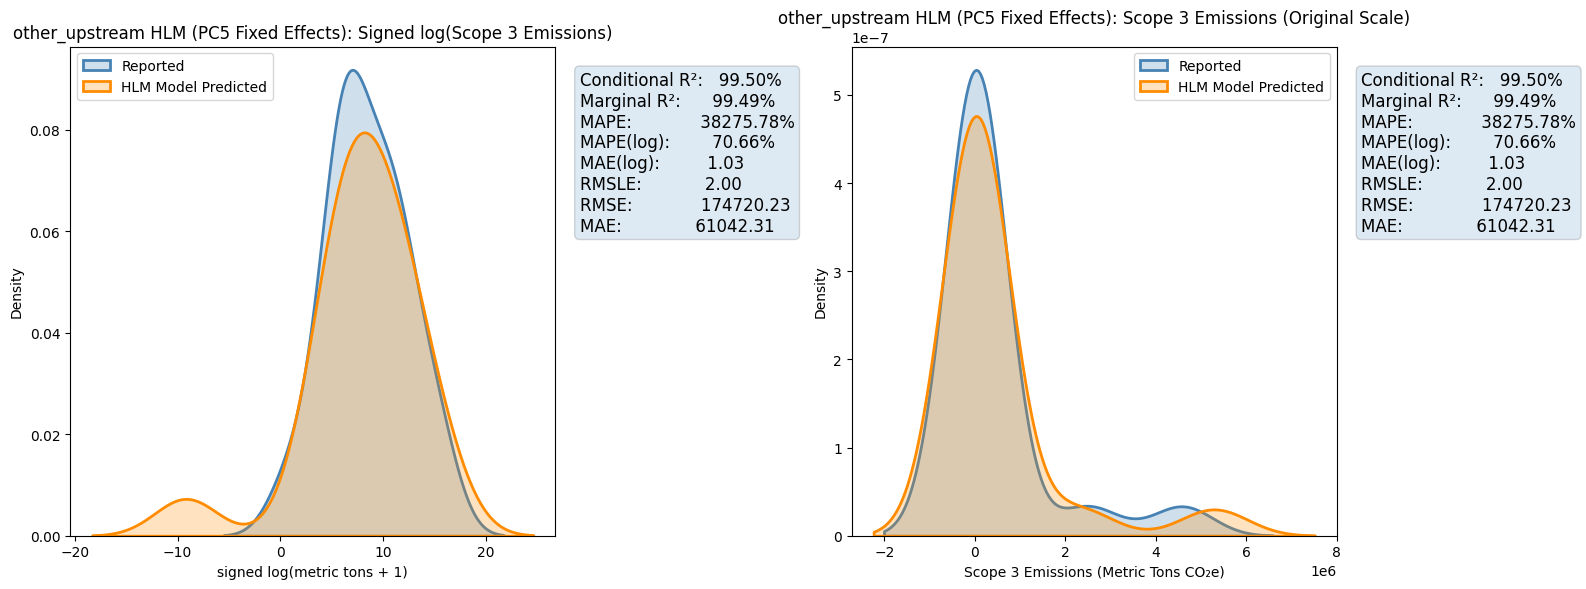

/var/folders/xg/l8wdpld13bj50z9_5w19ry4w0000gn/T/ipykernel_55948/4287308990.py:197: RuntimeWarning: invalid value encountered in log10
  log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
/Users/amberjensen/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:669: FutureWarning: The behavior of Series.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  thin_bar_idx = hist_metadata["widths"].idxmin()


KeyError: nan

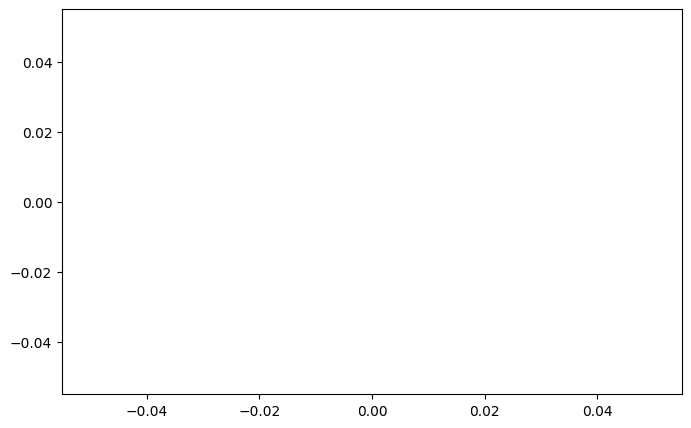

In [20]:
# --- Prepare Data ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in other_upstream.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(other_upstream[col])
    and col != "Scope_3_emissions_amount"
]
X = other_upstream[numeric_cols].copy()

def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)

# Only use rows with complete numeric data for PCA and all downstream splits
pca_data = X_transformed.dropna().copy()
pca_data["account_id"] = other_upstream.loc[pca_data.index, "account_id"]
pca_data["Year"] = other_upstream.loc[pca_data.index, "Year"]

X_pca_input = pca_data.drop(columns=["account_id", "Year"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# --- PCA with 8 components (PC8) ---
pca8 = PCA(n_components=8)
pcs8 = pca8.fit_transform(X_scaled)
pcs8_df = pd.DataFrame(pcs8, columns=[f"PC8_{i}" for i in range(1, 9)], index=pca_data.index)

# --- PCA with 5 components (PC5) ---
pca5 = PCA(n_components=5)
pcs5 = pca5.fit_transform(X_scaled)
pcs5_df = pd.DataFrame(pcs5, columns=[f"PC5_{i}" for i in range(1, 6)], index=pca_data.index)

# --- Merge all PC features to original DataFrame ---
other_upstream_pca = other_upstream.copy()
other_upstream_pca = other_upstream_pca.join(pcs8_df)
other_upstream_pca = other_upstream_pca.join(pcs5_df)

# Apply sign-log transformation to the target feature
other_upstream_pca['slog_Scope_3_emissions_amount'] = sign_log_transform(other_upstream_pca['Scope_3_emissions_amount'])

# Optional: Rename columns for consistency
other_upstream_pca = other_upstream_pca.rename(columns={'incorporated_country': 'Countries',
                                               'Primary activity': 'Primary_activity',
                                               'Primary sector': 'Primary_sector'})

# --- 1. Define split logic using only rows used in PCA (pca_data.index) ---
valid_idx = pca_data.index
other_upstream_pca_valid = other_upstream_pca.loc[valid_idx].copy()

train_mask = (other_upstream_pca_valid['Year'] >= 2018) & (other_upstream_pca_valid['Year'] <= 2022)
test_mask = (other_upstream_pca_valid['Year'] == 2023)
test_accounts = set(other_upstream_pca_valid.loc[test_mask, 'account_id'])
train_mask = train_mask & (other_upstream_pca_valid['account_id'].isin(test_accounts))

train_df_pc5 = other_upstream_pca_valid[train_mask].copy()
test_df_pc5 = other_upstream_pca_valid[test_mask].copy()
valid_accounts = set(train_df_pc5['account_id'].unique())
test_df_pc5 = test_df_pc5[test_df_pc5['account_id'].isin(valid_accounts)]

# --- 2. Filter for required columns only ---
feature_cols_pc5 = [f'PC5_{i}' for i in range(1, 6)]
target_col_pc5 = 'slog_Scope_3_emissions_amount'
cat_cols_pc5 = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars_pc5 = feature_cols_pc5 + [target_col_pc5] + cat_cols_pc5
train_df_pc5 = train_df_pc5.dropna(subset=all_model_vars_pc5).copy()
test_df_pc5 = test_df_pc5.dropna(subset=all_model_vars_pc5).copy()

# --- 3. Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_pc5[cat_col].unique())
    n_before = len(test_df_pc5)
    test_df_pc5 = test_df_pc5[test_df_pc5[cat_col].isin(train_cats)]
    n_after = len(test_df_pc5)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_pc5.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- 4. Model formula ---
    fixed_effects = (
        ' + '.join(feature_cols_pc5) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_pc5} ~ {fixed_effects}'

    # --- 5. Fit the mixed-effects model ---
    import statsmodels.formula.api as smf
    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc5, groups=train_df_pc5['account_id'])
        mdf_pc5 = md.fit(reml=False)
    print(mdf_pc5.summary())

    # --- 6. CALCULATE CONDITIONAL AND MARGINAL R² ---
    var_fixed = np.var(mdf_pc5.fittedvalues)
    var_resid = mdf_pc5.scale
    var_random = mdf_pc5.cov_re.iloc[0, 0] if mdf_pc5.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- 7. Predict on test set ---
    test_df_pc5['predicted_log'] = mdf_pc5.predict(test_df_pc5)
    test_df_pc5['predicted'] = np.sign(test_df_pc5['predicted_log']) * (np.expm1(np.abs(test_df_pc5['predicted_log'])))

    # --- 8. Metrics ---
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
    y_true_log = test_df_pc5[target_col_pc5]
    y_pred_log = test_df_pc5['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc5['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nother_upstream HLM with PC5 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 9. Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_pc5.params,
        'pvalue': mdf_pc5.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 10. Visualization ---
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("other_upstream HLM (PC5 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("other_upstream HLM (PC5 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("other_upstream HLM (PC5 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 11. RETURN METRICS FOR SUMMARY TABLE ---
    pc5_model_metrics = {
        "Model": "HLM PC5",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc5),
        "# Obs (test)": len(test_df_pc5),
        "# Obs (train/test)": f"{len(train_df_pc5)}/{len(test_df_pc5)}"
    }

Now I'll look into hierarchical clustering to determine if that may add value to increasing prediction accuracy.

## Hierarchical Clustering

In [22]:
other_upstream_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   230 non-null    object 
 1   account_id                     230 non-null    int64  
 2   Year                           230 non-null    int64  
 3   Countries                      230 non-null    object 
 4   Primary_activity               230 non-null    object 
 5   Primary_sector                 230 non-null    object 
 6   Market_Cap_USD                 198 non-null    float64
 7   Revenue_USD                    197 non-null    float64
 8   ebitda_USD                     197 non-null    float64
 9   grossProfit_USD                197 non-null    float64
 10  netIncome_USD                  197 non-null    float64
 11  cashAndCashEquivalents_USD     197 non-null    float64
 12  shortTermInvestments_USD       197 non-null    flo

Optimal number of clusters (highest silhouette score): 2


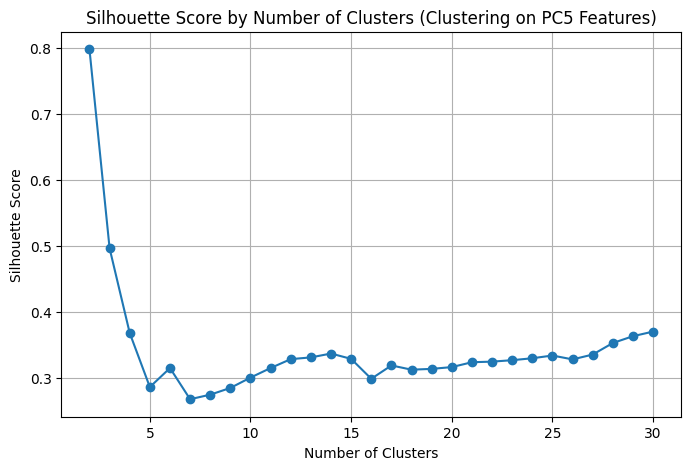

Number of observations in each cluster:
1    194
2      1
Name: count, dtype: int64


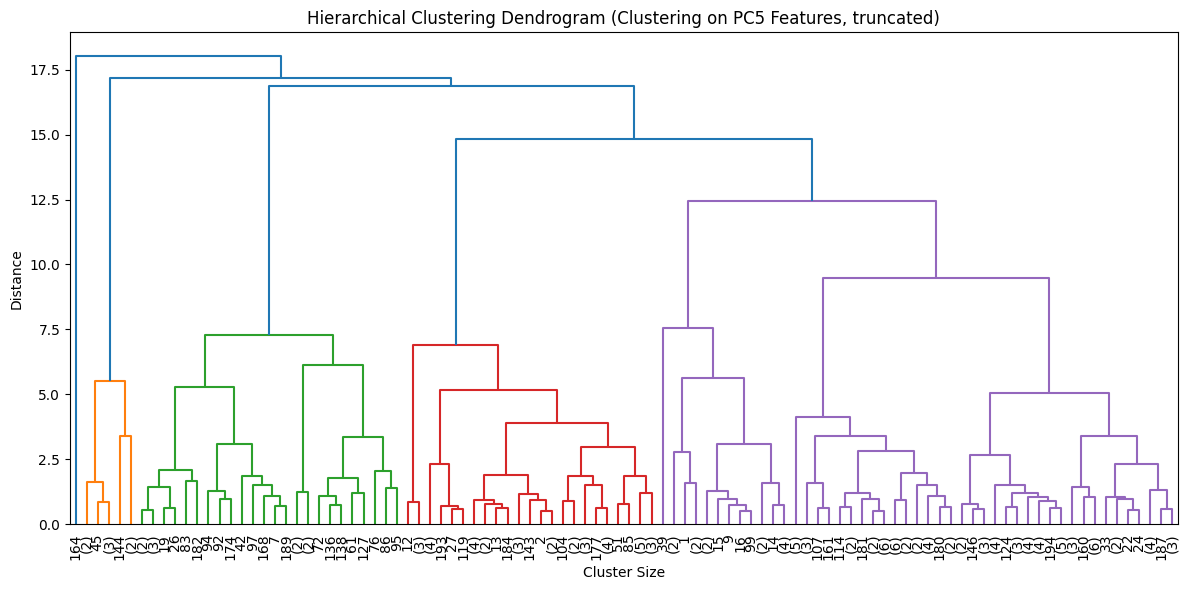

In [23]:
# --- STEP 1: Select PC5 PCA components for clustering ---
pc5_cols = [f'PC5_{i}' for i in range(1, 6)]
X_pc5 = other_upstream_pca[pc5_cols].dropna()
clust_indices = X_pc5.index

# --- STEP 2: Standardize the PC5 data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pc5)

# --- STEP 3: Hierarchical clustering (Ward linkage) ---
Z = linkage(X_scaled, method='ward')

# --- STEP 4: Find optimal number of clusters using silhouette score ---
range_n_clusters = range(2, 31)  # 2 to 30 clusters
sil_scores = []

for n_clusters in range_n_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

optimal_n_clusters = range_n_clusters[np.argmax(sil_scores)]
print(f"Optimal number of clusters (highest silhouette score): {optimal_n_clusters}")

# --- Plot silhouette scores ---
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters (Clustering on PC5 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# --- STEP 5: Assign optimal cluster labels ---
labels_optimal = fcluster(Z, optimal_n_clusters, criterion='maxclust')

# --- STEP 6: Append cluster labels back to original DataFrame (only for valid rows) ---
other_upstream_pca_clusters = other_upstream_pca.copy()
other_upstream_pca_clusters['Cluster'] = np.nan  # initialize with NaN
other_upstream_pca_clusters.loc[clust_indices, 'Cluster'] = labels_optimal

# --- Print cluster counts ---
print("Number of observations in each cluster:")
print(pd.Series(labels_optimal).value_counts())

# --- Optionally plot dendrogram (subset for readability) ---
plt.figure(figsize=(12, 6))
sample_size = min(100, len(X_scaled))  # Plot up to 100 samples for clarity
dendrogram(Z, truncate_mode='lastp', p=sample_size, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Clustering on PC5 Features, truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [24]:
other_upstream_pca_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   230 non-null    object 
 1   account_id                     230 non-null    int64  
 2   Year                           230 non-null    int64  
 3   Countries                      230 non-null    object 
 4   Primary_activity               230 non-null    object 
 5   Primary_sector                 230 non-null    object 
 6   Market_Cap_USD                 198 non-null    float64
 7   Revenue_USD                    197 non-null    float64
 8   ebitda_USD                     197 non-null    float64
 9   grossProfit_USD                197 non-null    float64
 10  netIncome_USD                  197 non-null    float64
 11  cashAndCashEquivalents_USD     197 non-null    float64
 12  shortTermInvestments_USD       197 non-null    flo

## HLM Model using PC4 pc's and cluster labels

In [25]:
# --- Define columns ---
numeric_cols = [
    'Market_Cap_USD',
    'Revenue_USD',
    'totalAssets_USD',
    'totalLiabilities_USD',
    'totalInvestments_USD',
    'totalDebt_USD',
    'totalEquity_USD',
    'ebitda_USD',
    'Scope_3_emissions_amount',
    'scope_1_2_emissions_amount'
]

# Add principal components columns if they exist (e.g., PC8_1...PC8_8 and/or PC5_1...PC5_5)
pc_cols = [col for col in other_upstream_pca_clusters.columns if col.startswith("PC8_") or col.startswith("PC5_")]
numeric_cols_all = numeric_cols + pc_cols

# Required categorical columns (add any other model-relevant columns here)
required_cols = [
    'account_id', 'Year', 'Countries', 'Primary_activity', 'Cluster'
] + numeric_cols_all

# --- Prepare Data ---
df = other_upstream_pca_clusters[required_cols].dropna()

# --- Signed log transform on all numeric columns ---
def signed_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

for col in numeric_cols_all:
    df[f'slog_{col}'] = signed_log(df[col])

# --- Company-level split by year ---
train_df = df[df['Year'].between(2018, 2022)].copy()
test_df  = df[df['Year'] == 2023].copy()

# Keep only companies present in training
valid_companies = set(train_df['account_id'].unique())
test_df = test_df[test_df['account_id'].isin(valid_companies)].copy()

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (169, 51)
Test shape: (18, 51)


                                                   Mixed Linear Model Regression Results
Model:                                   MixedLM                      Dependent Variable:                      slog_Scope_3_emissions_amount
No. Observations:                        169                          Method:                                  ML                           
No. Groups:                              66                           Scale:                                   0.2756                       
Min. group size:                         1                            Log-Likelihood:                          -202.0717                    
Max. group size:                         5                            Converged:                               Yes                          
Mean group size:                         2.6                                                                                                
-----------------------------------------------------------------

/Users/amberjensen/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))
/Users/amberjensen/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


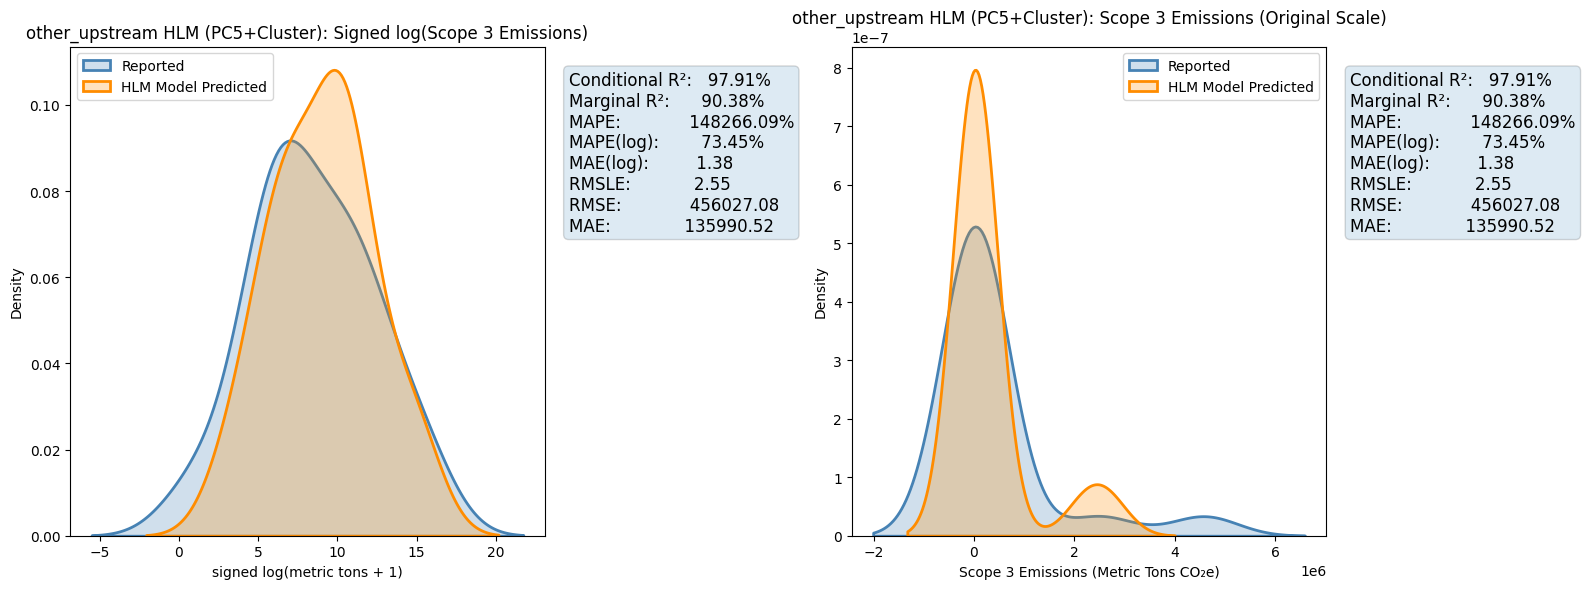

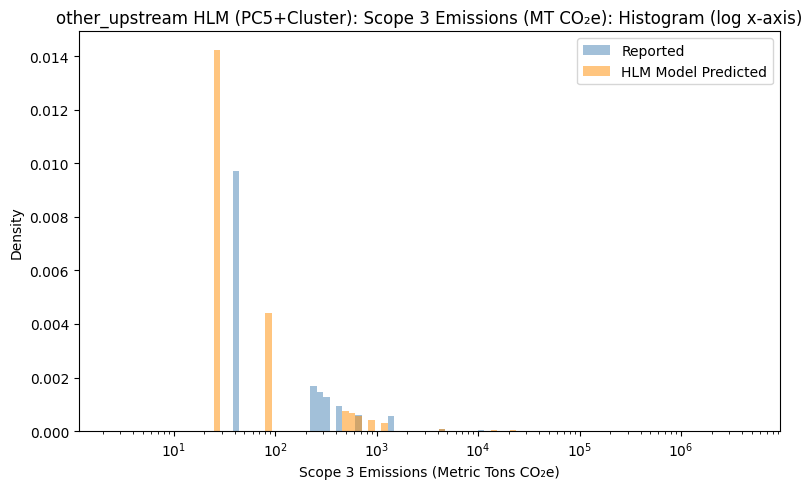

In [26]:
# --- PC5 + Cluster HLM ---

# Use other_upstream_pca_clusters for all data splits and lookups
feature_cols_pc5_cluster = [f'PC5_{i}' for i in range(1, 6)] + ['Cluster']  # Use capital 'C' for cluster column
target_col = 'slog_Scope_3_emissions_amount'
cat_cols = ['Countries', 'Year', 'account_id', 'Primary_activity']

# If you want to include PC8 features in future modeling, they are available in this dataframe:
all_pc8_cols = [f'PC8_{i}' for i in range(1, 9)]

# All model variables for current run
all_model_vars = feature_cols_pc5_cluster + [target_col] + cat_cols

# --- Prepare Data ---
# Ensure downstream splits always use other_upstream_pca_clusters so PC8 features are available if needed
train_df_pc5 = other_upstream_pca_clusters[
    (other_upstream_pca_clusters['Year'] >= 2018) & (other_upstream_pca_clusters['Year'] <= 2022)
].copy()
test_df_pc5 = other_upstream_pca_clusters[
    (other_upstream_pca_clusters['Year'] == 2023)
].copy()

valid_companies = set(train_df_pc5['account_id'].unique())
test_df_pc5 = test_df_pc5[test_df_pc5['account_id'].isin(valid_companies)].copy()

# --- 1. Ensure 'Cluster' exists in train/test (should already be present if assigned during clustering)
# If you have a lowercase 'cluster' accidentally used, fix it:
if 'cluster' in train_df_pc5.columns and 'Cluster' not in train_df_pc5.columns:
    train_df_pc5['Cluster'] = train_df_pc5['cluster']
if 'cluster' in test_df_pc5.columns and 'Cluster' not in test_df_pc5.columns:
    test_df_pc5['Cluster'] = test_df_pc5['cluster']

# --- 2. Drop any remaining missing values (should be minimal) ---
train_df_pc5c = train_df_pc5.dropna(subset=all_model_vars).copy()
test_df_pc5c  = test_df_pc5.dropna(subset=all_model_vars).copy()

# --- 3. Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity', 'Cluster']:
    train_cats = set(train_df_pc5c[cat_col].unique())
    n_before = len(test_df_pc5c)
    test_df_pc5c = test_df_pc5c[test_df_pc5c[cat_col].isin(train_cats)]
    n_after = len(test_df_pc5c)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_pc5c.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- 4. Model formula ---
    fixed_effects = (
        ' + '.join([f'C({col})' if col == 'Cluster' else col for col in feature_cols_pc5_cluster]) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col} ~ {fixed_effects}'

    # --- 5. Fit the mixed-effects model ---
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc5c, groups=train_df_pc5c['account_id'])
        mdf_pc5c = md.fit(reml=False)
    print(mdf_pc5c.summary())

    # --- 6. CALCULATE CONDITIONAL AND MARGINAL R² ---
    var_fixed = np.var(mdf_pc5c.fittedvalues)
    var_resid = mdf_pc5c.scale
    var_random = mdf_pc5c.cov_re.iloc[0, 0] if mdf_pc5c.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- 7. Predict on test set ---
    test_df_pc5c['predicted_log'] = mdf_pc5c.predict(test_df_pc5c)
    test_df_pc5c['predicted'] = np.sign(test_df_pc5c['predicted_log']) * (np.expm1(np.abs(test_df_pc5c['predicted_log'])))

    # --- 8. Metrics ---
    y_true_log = test_df_pc5c[target_col]
    y_pred_log = test_df_pc5c['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc5c['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nother_upstream HLM with PC5+Cluster Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 9. Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_pc5c.params,
        'pvalue': mdf_pc5c.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 10. Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("other_upstream HLM (PC5+Cluster): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("other_upstream HLM (PC5+Cluster): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("other_upstream HLM (PC5+Cluster): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 12. RETURN METRICS FOR SUMMARY TABLE ---
    pc5_cluster_model_metrics = {
        "Model": "HLM PC5+Cluster",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc5c),
        "# Obs (test)": len(test_df_pc5c),
        "# Obs (train/test)": f"{len(train_df_pc5c)}/{len(test_df_pc5c)}"
    }

## Metrics Table

In [27]:
# Collect metrics dicts from each model; change names as needed
metrics_dicts = [
    #PC8_model_metrics,        # e.g., "HLM PC8"
    #pc5_model_metrics,        # e.g., "HLM PC5"
    pc5_cluster_model_metrics # e.g., "HLM PC5 + Cluster"
]

# Attach observation counts to each dictionary
for metrics, train, test in zip(
        metrics_dicts,
        [train_df]*3,
        [test_df]*3):
    metrics["# Obs (train)"] = len(train)
    metrics["# Obs (test)"] = len(test)
    metrics["# Obs (train/test)"] = f"{len(train)}/{len(test)}"

# Add a new row for your "Optimized" model
optimized_row = {
    "Model": "Optimized other_upstream HLM",
    "Conditional_R2": 0.9766,   # as a fraction, not percent
    "Marginal_R2": 0.9009,
    "RMSE": 81892.46,
    "MAE": 37800.73,
    "MAE_log": 1.3,
    "RMSLE": 2.47,
    "MAPE": 85036.98,
    "# Obs (train/test)": "169/18"
}
metrics_dicts.append(optimized_row)

metrics_df = pd.DataFrame(metrics_dicts)

# Order columns for summary
desired_order = [
    "Model", "Conditional_R2", "Marginal_R2", "RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "# Obs (train/test)"
]

# Add MAE_log if missing
if "MAE_log" not in metrics_df.columns:
    metrics_df["MAE_log"] = np.nan

metrics_df = metrics_df[[col for col in desired_order if col in metrics_df.columns]]

# Format for display
metrics_df_display = metrics_df.copy()
if "Conditional_R2" in metrics_df_display.columns:
    metrics_df_display["Conditional_R2"] = (metrics_df_display["Conditional_R2"].astype(float) * 100).map("{:.2f}%".format)
if "Marginal_R2" in metrics_df_display.columns:
    metrics_df_display["Marginal_R2"] = (metrics_df_display["Marginal_R2"].astype(float) * 100).map("{:.2f}%".format)
for col in ["RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "MAPE(log)"]:
    if col in metrics_df_display.columns:
        metrics_df_display[col] = metrics_df_display[col].astype(float).map("{:.2f}".format)

# Display in notebook or print
try:
    display(metrics_df_display)
except Exception:
    print(metrics_df_display.to_string(index=False))

,Model,Conditional_R2,Marginal_R2,RMSE,MAE,MAE_log,RMSLE,MAPE,# Obs (train/test)
0,HLM PC5+Cluster,97.91%,90.38%,456027.08,135990.52,1.38,2.55,148266.09,169/18
1,Optimized other_upstream HLM,97.66%,90.09%,81892.46,37800.73,1.30,2.47,85036.98,169/18
